In [21]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
#런타임 다시시작

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd  
import seaborn as sns
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')
# %matplotlib inline  주피터 노느북에서 그래프를 볼 때 사용하는 매직명령어

In [2]:
#파일업로드
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]


Saving 유튜브_순위.csv to 유튜브_순위 (3).csv


In [3]:
df = pd.read_csv(filename)
df.head()

,카테고리,채널명,구독자수,조회수,비디오수
0,음악/댄스/가수,BLACKPINK,64100000,19018090000,371
1,음악/댄스/가수,HYBE LABELS,60400000,18735840000,654
2,음악/댄스/가수,BANGTANTV,56500000,12212970000,1579
3,음악/댄스/가수,SMTOWN,28500000,21895380000,3729
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],26500000,11052880000,223


In [4]:
df['구독자수2'] = df.구독자수.apply(lambda x : int(x.replace(',','')))

AttributeError: ignored

In [5]:
def str2int(x):
    return int(x.replace(',',''))

In [10]:
df['비디오수2'] = df.비디오수.apply(str2int)

AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 201 missing from current font.
  font.set_text(s, 0, flags=flags)


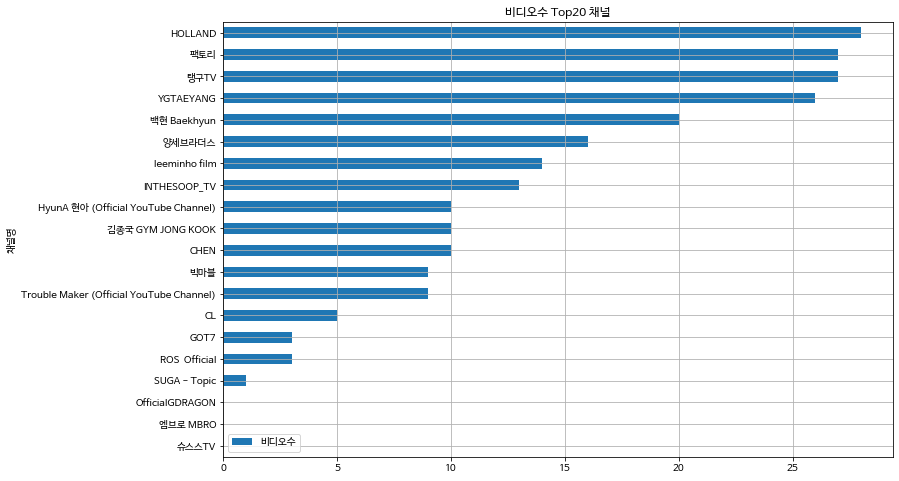

In [21]:
df2 = df[['채널명', '비디오수']]
df2.set_index('채널명', inplace=True)
df2.sort_values(by='비디오수').head(20).plot(kind='barh', grid =True, figsize=(12,8))
plt.title('비디오수 Top20 채널')
plt.show()

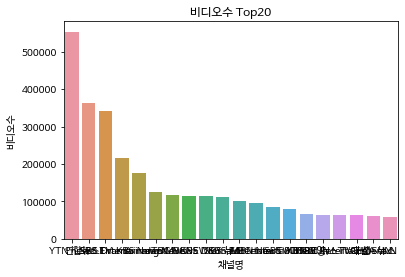

In [20]:
import seaborn as sns
df2 = df[['채널명', '비디오수']].sort_values(by='비디오수', ascending=False)
sns.barplot(x='채널명', y='비디오수', data=df2.head(20))
plt.title('비디오수 Top20')
plt.show()

## 조회수 기준 Top20 채널 시각화

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 201 missing from current font.
  font.set_text(s, 0, flags=flags)


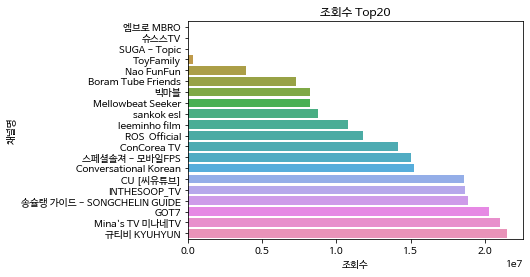

In [30]:
import seaborn as sns
df2 = df[['채널명', '조회수']].sort_values(by='조회수', ascending =True)
sns.barplot(y='채널명', x='조회수', data=df2.head(20))
plt.title('조회수 Top20')
plt.show()

- 카테고리별 채널수 분포

In [32]:
df.카테고리.value_counts().to_frame()

,카테고리
음악/댄스/가수,171
TV/방송,146
미분류,114
키즈/어린이,88
음식/요리/레시피,85
게임,74
BJ/인물/연예인,71
뉴스/정치/사회,53
패션/미용,44
취미/라이프,38


In [43]:
df3 = df[['카테고리','구독자수']].groupby('카테고리').count()
df3

ValueError: ignored

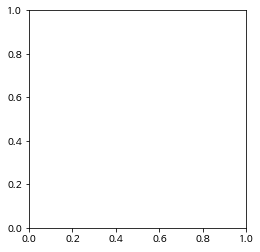

In [47]:
 
df3 = df[['카테고리','구독자수']].groupby('카테고리').count()
plt.pie('카테고리', labels=df2.index, autopct='%.1f%%')
plt.show()
plt.title('조회수 Top20')
plt.show()
 

In [46]:
df[['카테고리','구독자수']].groupby('카테고리').agg(['count','sum'])

구독자수           
          count        sum
카테고리                      
BJ/인물/연예인    71   97610000
IT/기술/컴퓨터     8    7960000
TV/방송       146  229800000
게임           74   67170000
교육/강의        22   23440000
국내/해외/여행      4    3440000
뉴스/정치/사회     53   71050000
미분류         114  143460000
스포츠/운동        8   10840000
애완/반려동물      19   26890000
영화/만화/애니     33   34680000
음식/요리/레시피    85  180620000
음악/댄스/가수    171  674550000
자동차           2    1240000
주식/경제/부동산     8    7850000
취미            1     600000
취미/라이프       38   47890000
키즈/어린이       88  257790000
패션/미용        44   44380000
해외            6   12130000
회사/오피셜        5   11750000

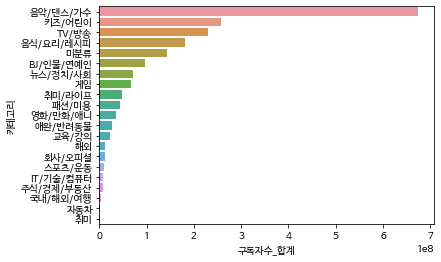

In [54]:
df4 = df[['카테고리','구독자수']].groupby('카테고리').agg(['count','sum'])
df4.columns = ['채널수', '구독자수_합계']
df4.sort_values(by='구독자수_합계', ascending=False, inplace=True)
df4.reset_index(inplace=True)
sns.barplot(x='구독자수_합계', y='카테고리', data=df4)
plt.show()